In [4]:
# 2. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pickle

# To display plots nicely
plt.style.use("default")




In [5]:
# 3. Load Dataset
file_path = "climate accident data.csv"   # <-- your file name
df = pd.read_csv(file_path)

print("Shape of data:", df.shape)
df.head()



Shape of data: (840, 14)


,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


basic EDA 

In [6]:
# 4. Basic Info
print("\nColumns in dataset:\n", df.columns.tolist())

print("\nData types and non-null counts:")
print(df.info())

print("\nStatistical summary (numeric columns):")
print(df.describe())

print("\nMissing values per column:")
print(df.isnull().sum())



Columns in dataset:
 ['Weather', 'Road_Type', 'Time_of_Day', 'Traffic_Density', 'Speed_Limit', 'Number_of_Vehicles', 'Driver_Alcohol', 'Accident_Severity', 'Road_Condition', 'Vehicle_Type', 'Driver_Age', 'Driver_Experience', 'Road_Light_Condition', 'Accident']

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     798 non-null    object 
 8   Road_Condition        798 non-null    object 
 9   Vehicle_Type          798 non-null

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


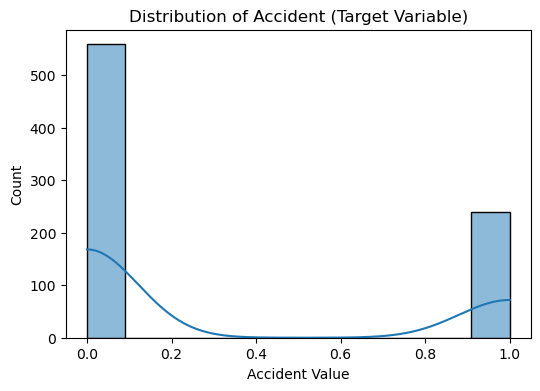

In [7]:
# 5.1 Distribution of target variable 'Accident'
plt.figure(figsize=(6,4))
sns.histplot(df["Accident"], kde=True)
plt.title("Distribution of Accident (Target Variable)")
plt.xlabel("Accident Value")
plt.ylabel("Count")
plt.show()


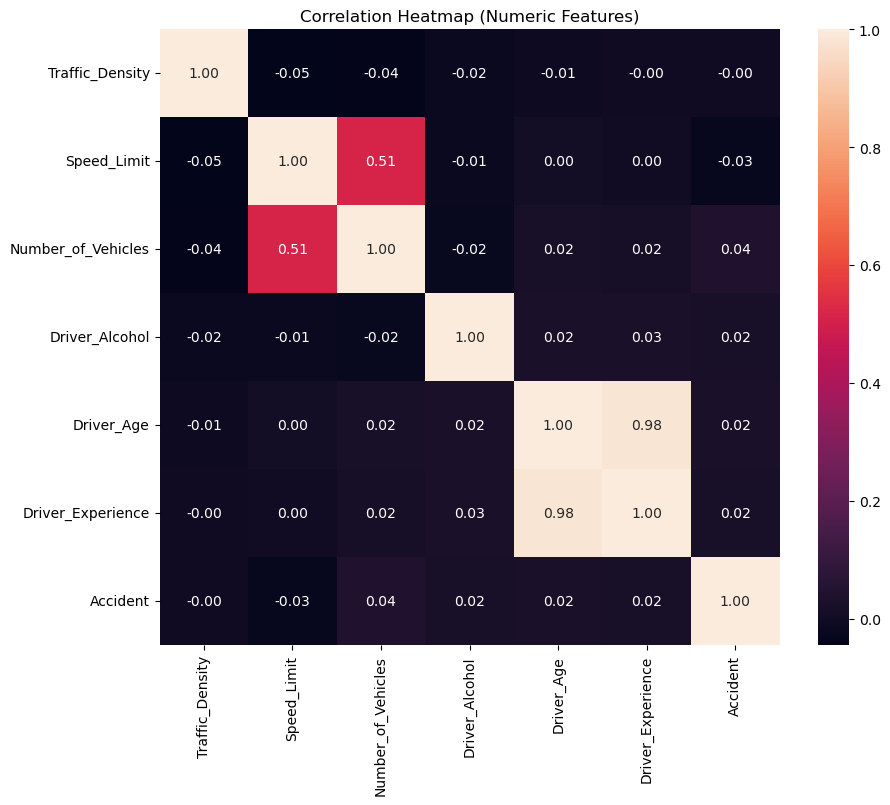

In [8]:
# 5.2 Correlation heatmap (numeric columns only)
numeric_df = df.select_dtypes(include=["int64", "float64"])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


In [9]:
# 6. Define Target and Features
target_col = "Accident"   # change if your target name is different

X = df.drop(columns=[target_col])
y = df[target_col]

print("Features shape:", X.shape)
print("Target shape:", y.shape)

print("\nFirst 5 values of target:")
print(y.head())


Features shape: (840, 13)
Target shape: (840,)

First 5 values of target:
0    0.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: Accident, dtype: float64


In [10]:
print(df['Accident'].isnull().sum())


42


In [11]:

# Remove rows with missing target values
df = df.dropna(subset=['Accident'])

# Define target and features again
X = df.drop(columns=['Accident'])
y = df['Accident']
print(df['Accident'].isnull().sum())


0


In [12]:
# 7. Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)




X_train: (638, 13)
X_test: (160, 13)


In [13]:
# 8. Preprocessing

# Separate numeric and categorical columns
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object", "bool", "category"]).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

# Pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine both into ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

baseline_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

baseline_model.fit(X_train, y_train)



Numeric features: ['Traffic_Density', 'Speed_Limit', 'Number_of_Vehicles', 'Driver_Alcohol', 'Driver_Age', 'Driver_Experience']
Categorical features: ['Weather', 'Road_Type', 'Time_of_Day', 'Accident_Severity', 'Road_Condition', 'Vehicle_Type', 'Road_Light_Condition']


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [23]:
# 9. Baseline Model: Linear Regression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Baseline model prediction
y_pred_base = baseline_model.predict(X_test)

# Metrics
mae_base = mean_absolute_error(y_test, y_pred_base)
mse_base = mean_squared_error(y_test, y_pred_base)
rmse_base = mse_base ** 0.5  # sqrt of mse
r2_base = r2_score(y_test, y_pred_base)

print("Baseline Linear Regression:")
print(f"MAE:  {mae_base:.3f}")
print(f"RMSE: {rmse_base:.3f}")
print(f"R2:   {r2_base:.3f}")


Baseline Linear Regression:
MAE:  0.410
RMSE: 0.456
R2:   0.009


In [14]:
# 10. Train multiple regression models and compare

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {
    "RandomForestRegressor": RandomForestRegressor(random_state=42),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=42)
}

results = {}
fitted_models = {}

for name, reg in models.items():
    print(f"\nTraining: {name}")
    
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", reg)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)   # MSE only
    rmse = mse ** 0.5                          # manual RMSE
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}
    fitted_models[name] = pipe
    
    print(f"{name} -> MAE: {mae:.3f}, RMSE: {rmse:.3f}, R2: {r2:.3f}")

print("\nAll model results:")
results



Training: RandomForestRegressor
RandomForestRegressor -> MAE: 0.403, RMSE: 0.443, R2: 0.064

Training: GradientBoostingRegressor
GradientBoostingRegressor -> MAE: 0.405, RMSE: 0.460, R2: -0.009

All model results:


{'RandomForestRegressor': {'MAE': 0.4030625,
  'RMSE': 0.4433459428031343,
  'R2': 0.06402083333333308},
 'GradientBoostingRegressor': {'MAE': 0.4052132386517444,
  'RMSE': 0.4602594925865235,
  'R2': -0.008756192933352835}}

In [15]:

# 11. Choose best model based on R2 score
best_model_name = max(results, key=lambda m: results[m]["R2"])
best_model = fitted_models[best_model_name]

print("\nBest Model:", best_model_name)
print("Best Model Scores:", results[best_model_name])





Best Model: RandomForestRegressor
Best Model Scores: {'MAE': 0.4030625, 'RMSE': 0.4433459428031343, 'R2': 0.06402083333333308}


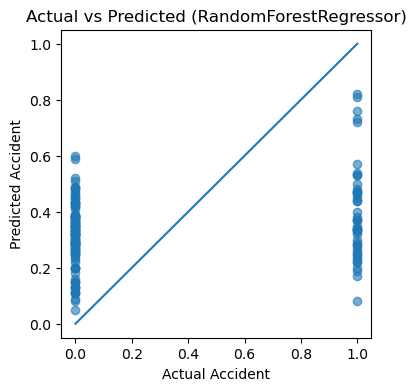

In [16]:
# 12.1 Actual vs Predicted Plot for best model
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(4,4))
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.xlabel("Actual Accident")
plt.ylabel("Predicted Accident")
plt.title(f"Actual vs Predicted ({best_model_name})")
# line y=x for reference
min_val = min(y_test.min(), y_pred_best.min())
max_val = max(y_test.max(), y_pred_best.max())
plt.plot([min_val, max_val], [min_val, max_val])
plt.show()



C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


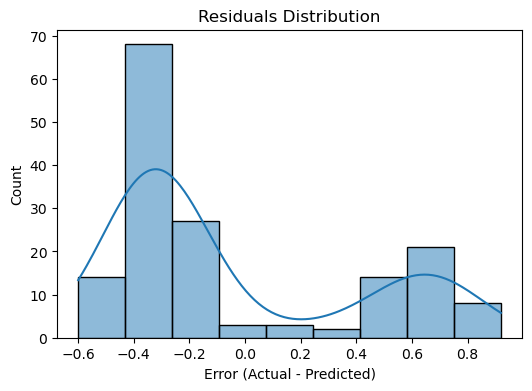

In [17]:
# 12.2 Residuals (Actual - Predicted)
residuals = y_test - y_pred_best

plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Count")
plt.show()


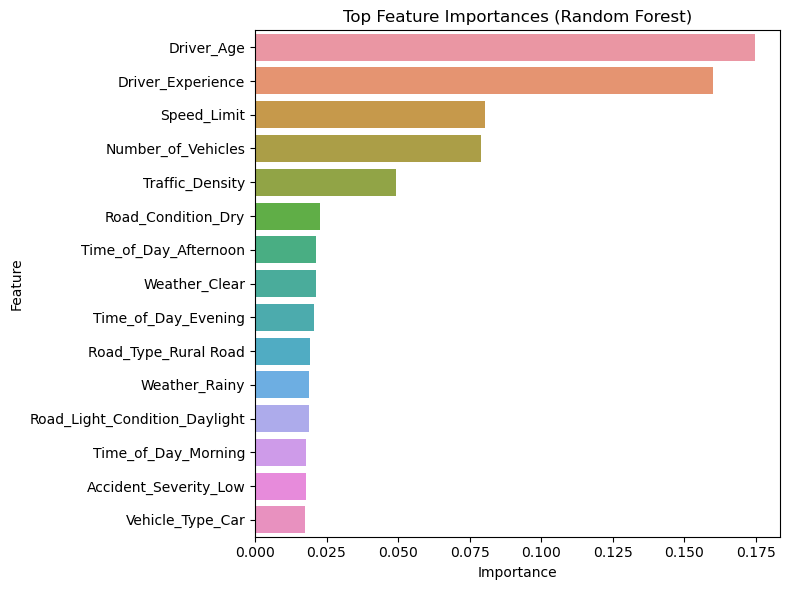

In [18]:
# 13. Feature Importance (works when best model is RandomForestRegressor)

if "RandomForestRegressor" in best_model_name:
    # Extract the underlying RF model and feature names after preprocessing
    rf = best_model.named_steps["model"]
    
    # Get feature names created by ColumnTransformer
    ohe = best_model.named_steps["preprocessor"].named_transformers_["cat"]["onehot"]
    cat_feature_names = ohe.get_feature_names_out(categorical_features)
    all_feature_names = numeric_features + list(cat_feature_names)
    
    importances = rf.feature_importances_
    
    # Put into DataFrame
    fi_df = pd.DataFrame({
        "feature": all_feature_names,
        "importance": importances
    }).sort_values("importance", ascending=False).head(15)  # top 15
    
    plt.figure(figsize=(8,6))
    sns.barplot(data=fi_df, x="importance", y="feature")
    plt.title("Top Feature Importances (Random Forest)")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()
else:
    print("Best model is not RandomForestRegressor, skipping feature importance plot.")


In [19]:
# 14. Save best model using pickle
model_filename = "best_climate_accident_model.pkl"
pickle.dump(best_model, open(model_filename, "wb"))
print(f"Saved best model ({best_model_name}) to {model_filename}")


Saved best model (RandomForestRegressor) to best_climate_accident_model.pkl


In [21]:
# 15. Function to predict accident for new input data

# ================================
#  PREDICTION FROM USER INPUT
# ================================

def predict_accident_manual():
    print("Enter values for prediction:\n")

    input_data = {
        "Driver_Age": float(input("Driver Age: ")),
        "Time_of_Day": input("Time of Day (Morning/Afternoon/Evening/Night): "),
        "Driver_Experience": float(input("Driver Experience (years): ")),
        "Number_of_Vehicles": int(input("Number of Vehicles: ")),
        "Traffic_Density": int(input("Traffic Density (1=Low, 2=Medium, 3=High): ")),
        "Road_Type": input("Road Type (Highway/Urban/Rural): "),
        "Vehicle_Type": input("Vehicle Type (Car/Truck/Bike/Bus/etc): "),
        "Driver_Alcohol": int(input("Driver Alcohol (0=No, 1=Yes): ")),
        "Speed_Limit": float(input("Speed Limit: ")),
        "Road_Condition": input("Road Condition (Dry/Wet/Snow/Gravel): "),
        "Road_Light_Condition": input("Light Condition (Day/Night/Low Light): "),
        "Accident_Severity": input("Accident Severity (Low/Medium/High): "),
        "Weather": input("Weather (Clear/Rain/Fog/Snow/Storm): ")
    }

    input_df = pd.DataFrame([input_data])

    # Ensure categorical columns remain string type
    for col in ['Weather','Road_Type','Time_of_Day','Accident_Severity','Road_Condition','Vehicle_Type','Road_Light_Condition']:
        input_df[col] = input_df[col].astype(str)

    prediction = best_model.predict(input_df)[0]

    print("\n==============================")
    print("Predicted Accident Value:", prediction)
    print("==============================")



# Call the function to start input prompt
predict_accident_manual()

# Example (you must use your actual column names below)
# example_input = {
#     "Temperature": 30,
#     "Humidity": 70,
#     "Rainfall": 5,
#     "WindSpeed": 12,
#     ... (other columns)
# }
# print("Predicted accident value:", predict_accident(example_input))


Enter values for prediction:

Driver Age: 45
Time of Day (Morning/Afternoon/Evening/Night): Night
Driver Experience (years): 15
Number of Vehicles: 3
Traffic Density (1=Low, 2=Medium, 3=High): 2
Road Type (Highway/Urban/Rural): Rain
Vehicle Type (Car/Truck/Bike/Bus/etc): Car
Driver Alcohol (0=No, 1=Yes): 0
Speed Limit: 60
Road Condition (Dry/Wet/Snow/Gravel): Dry
Light Condition (Day/Night/Low Light): Day
Accident Severity (Low/Medium/High): High
Weather (Clear/Rain/Fog/Snow/Storm): Clear

Predicted Accident Value: 0.32


In [20]:
print("Numeric columns:", X.select_dtypes(include=['int64','float64']).columns.tolist())
print("Categorical columns:", X.select_dtypes(include=['object']).columns.tolist())


Numeric columns: ['Traffic_Density', 'Speed_Limit', 'Number_of_Vehicles', 'Driver_Alcohol', 'Driver_Age', 'Driver_Experience']
Categorical columns: ['Weather', 'Road_Type', 'Time_of_Day', 'Accident_Severity', 'Road_Condition', 'Vehicle_Type', 'Road_Light_Condition']


In [38]:

import random

# ===============================
# Automatic Random Prediction
# ===============================

# Pick a random sample index
random_index = random.randint(0, len(X_test) - 1)

# Extract the sample (keep as DataFrame)
sample_input = X_test.iloc[random_index:random_index+1]

# Display the selected input values
print("===================================")
print(" Randomly selected input features:")
print("===================================\n")
print(sample_input)

# Make prediction
prediction = best_model.predict(sample_input)[0]

print("\n===================================")
print(" Predicted Accident Value:", prediction)
print("===================================")


 Randomly selected input features:

    Weather Road_Type Time_of_Day  Traffic_Density  Speed_Limit  \
385   Rainy   Highway     Morning              0.0         30.0   

     Number_of_Vehicles  Driver_Alcohol Accident_Severity Road_Condition  \
385                 3.0             0.0               NaN            Dry   

    Vehicle_Type  Driver_Age  Driver_Experience Road_Light_Condition  
385          Car        27.0               26.0             Daylight  

 Predicted Accident Value: 0.2


In [39]:
for i in range(5):
    random_index = random.randint(0, len(X_test)-1)
    sample_input = X_test.iloc[random_index:random_index+1]
    prediction = best_model.predict(sample_input)[0]
    
    print(f"\nSample {i+1}:")
    print(sample_input)
    print("Predicted Accident Value:", prediction)
    print("---------------------------------------")




Sample 1:
    Weather Road_Type Time_of_Day  Traffic_Density  Speed_Limit  \
838   Foggy   Highway   Afternoon              2.0         60.0   

     Number_of_Vehicles  Driver_Alcohol Accident_Severity Road_Condition  \
838                 3.0             0.0               Low            Dry   

    Vehicle_Type  Driver_Age  Driver_Experience Road_Light_Condition  
838          Car        25.0               19.0     Artificial Light  
Predicted Accident Value: 0.29
---------------------------------------

Sample 2:
    Weather   Road_Type Time_of_Day  Traffic_Density  Speed_Limit  \
669   Clear  Rural Road   Afternoon              0.0        100.0   

     Number_of_Vehicles  Driver_Alcohol Accident_Severity      Road_Condition  \
669                 4.0             1.0               Low  Under Construction   

    Vehicle_Type  Driver_Age  Driver_Experience Road_Light_Condition  
669          Car        21.0                NaN     Artificial Light  
Predicted Accident Value: 0.25
--

In [22]:
print("Numeric columns:", X.select_dtypes(include=['int64','float64']).columns.tolist())
print("Categorical columns:", X.select_dtypes(include=['object']).columns.tolist())






Numeric columns: ['Traffic_Density', 'Speed_Limit', 'Number_of_Vehicles', 'Driver_Alcohol', 'Driver_Age', 'Driver_Experience']
Categorical columns: ['Weather', 'Road_Type', 'Time_of_Day', 'Accident_Severity', 'Road_Condition', 'Vehicle_Type', 'Road_Light_Condition']
